# Time series graph of mentions and story units by geographic scale

to start, we will need to do a lot of data pre-processing. Hopefully OG (from google spreadsheets) is formatted like other stories, since we are using this as the model database.

to begin:
- open file and replace all ',' with ';'
- export the desired sheet to csv in the following format (initials_pm for place mentions and initials_su for story unit data).

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.lines import Line2D
import glob as gl

In [3]:
#fetch story data from csv files stored in /documents and with filename format "initials_type.csv" (e.g. og_pm, og_su). Store the fetched data as pandas dataframes inside dictionary d
storydata1 = gl.glob('documents_place_mentions/*.csv')
storydata2 = gl.glob('documents_story_units/*.csv')
i = 0
j = 0
d1 = {}
d2 = {}

#load csvs as dataframes into a dictionary
for story in storydata1:
    d1[story[25:30]] = pd.read_csv(story, sep=',', encoding='latin-1')
    i += 1

for story in storydata2:
    d2[story[22:27]] = pd.read_csv(story, sep=',', encoding='latin-1')
    j += 1

/mnt/c/Users/emory/Desktop/geomedialab_lifestories_timeseries/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the following commands to explore the data

In [4]:
#replace missing data with "null"
def cleanNA(df):
    df.dropna(axis=1, how='all', inplace=True)
    df.dropna(axis=0, how='all', inplace=True)
    df.fillna('null', inplace=True)

#name columns appropriately
def renameCols(name, df):
    if name[-2:] == 'pm':
        df.columns = ['session_num','time_clip','time', 'place','scale','characters','interviewer','year','comments']
    else:
        df.columns = ['session_num', 'su_num','time_clip_start', 'time_clip_end', 'time_start', 'time_end', 'place', 'characters', 'desc', 'scale', 'journey', 'transpo_method', 'pos_neg', 'imposed_movement', 'violence', 'chrono', 'chrono_comment', 'comment', 'su_length', 'su_length_nospace', 'int_unit_length']

def cleanVals(name, df):
    df['scale'] = df.scale.str.lower()
    df.loc[df['scale'].str.contains('unknown', case=False), 'scale'] = 'null'
    df['scale'].replace('city / area\n', 'city / area', inplace=True)
    #remove rows that are basically empty (make sure there are no actual story units containing no start and end-time, of course, but this should not be the case)
    if name[-2:] == 'su':
        nullList = df.loc[df['time_start'].str.contains('null', case=False) & df['time_end'].str.contains('null', case=False)].index
        for null in nullList:
            df.drop(null, inplace=True)
    #add more cleaning functions if needed
    
def timeVals(name, df):
    if name[-2:] == 'pm':
        df['time'] = pd.to_datetime(df.time, format='%H:%M:%S')
    else:
        df['time_start'] = pd.to_datetime(df.time_start, format='%H:%M:%S')
        df['time_end'] = pd.to_datetime(df.time_end, format='%H:%M:%S')

def newCols(name, df):    
    if name[-2:] == 'su':
        df.loc[df['journey'].str.contains('journey', case=False, na=False), 'scale'] = 'journey' #give scale "journey" to units that are journeys    
    df['scale_order'] = df['scale']
    df.loc[df['scale'].str.contains('journey'), 'scale_order'] = '1'
    df.loc[df['scale'].str.contains('local'), 'scale_order'] = '3'
    df.loc[df['scale'].str.contains('very local'), 'scale_order'] = '2'    
    df.loc[df['scale'].str.contains('city / area'), 'scale_order'] = '4'
    df.loc[df['scale'].str.contains('region'), 'scale_order'] = '5'
    df.loc[df['scale'].str.contains('country'), 'scale_order'] = '6'
    df.loc[df['scale'].str.contains('continent'), 'scale_order'] = '7'
    df.loc[df['scale'].str.contains('null'), 'scale_order'] = '8'
    df['scale_order'] = df.scale_order.astype(int)


for k, v in d1.items():
    cleanNA(v)
    renameCols(k, v)
    cleanVals(k, v)
    timeVals(k, v)
    newCols(k, v)

for k, v in d2.items():
    cleanNA(v)
    renameCols(k, v)
    cleanVals(k, v)
    timeVals(k, v)
    newCols(k, v)

In [4]:
#d['og_su']['scale'].unique()

#d['og_su'].index
#hi = d['og_su'].loc[d['og_su']['time_start'].str.contains('null', case=False) & d['og_su']['time_end'].str.contains('null', case=False)].index[0]

#hi = d['og_su'][~d['og_su'].time_start.str.contains('null') & ~d['og_su'].time_end.str.contains('null')].index

#hi = d['og_su'].time_start.index.get_loc('null')
#hi = d['og_su'][df['og_su'].time_start == 'null'].index
#ok = df['og_su'].drop(hi)
#print(hi)


d2['jr_su']['scale_order'].unique()

#it is not fv... one story is hitting a roadblock and somehow retaining NAN values in either journey or scale column...

array([8, 4, 6, 3])

clean up the data

In [5]:
#standardized cleanup


#OG specific: because df_su['scale'].str.lower() isn't working, using conditional statements to fix uppercase scales



#if scale equals to 'unknown', make 'none'
#development: remove most dbs

del d2['jm_su']
del d2['ct_su']
del d2['ep_su']
del d2['ap_su']
del d2['bn_su']
del d2['jr_su']
del d2['og_su']
del d2['ek_su']
del d2['eh_su']
del d1['jm_pm']
del d1['ct_pm']
del d1['ep_pm']
del d1['ap_pm']
del d1['bn_pm']
del d1['jr_pm']
del d1['og_pm']
del d1['ek_pm']
del d1['eh_pm']



#replace scale values for when place values are not equal to none
#df_su_scaleNone = df_su.loc[df_su['scale'] == 'null']
#df_su_scaleNone.loc[~df_su['place'].str.contains('none|unknown', case=False), 'scale'] = 'city / area'
#df_su.update(df_su_scaleNone, join='left', overwrite=True, filter_func=None, raise_conflict=False)


#add non-spatial story units and journeys to scale column
#select where place column contains journey or end and change associated cell in scale column to journey or end

In [6]:
pm_color = '#909AA0'
su_color = '#D3D3D3'
pm_color_alt = '#332E2E'
su_color_alt = '#D37961'

def generateVspans(name1, df1, name2, df2, ax):
    for i in range(len(df2.index)):
        ax.axvspan(xmin = dates.date2num(df2.iloc[i]['time_start']), xmax = dates.date2num(df2.iloc[i]['time_end']), ymin = df2.iloc[i]['scale_order']/8-(1/8), ymax = df2.iloc[i]['scale_order']/8, facecolor = su_color, alpha = 1, zorder=2, picker=5, label=df2.iloc[i]['place'], gid = 'su')
    for i in range(len(df1.index)):
        ax.axvspan(xmin = dates.date2num(df1.iloc[i]['time'])-0.0001, xmax = dates.date2num(df1.iloc[i]['time'])+0.0001, ymin = df1.iloc[i]['scale_order']/8-(1/8), ymax = df1.iloc[i]['scale_order']/8, facecolor = pm_color, alpha = 1, zorder=3, picker=5, label=df1.iloc[i]['place'], gid = 'pm')

In [25]:
figure = {}
errorlist = {}

def plotAll(name1, df1, name2, df2):
    
    #for calculating fig x-axis length (to make it proportional to each story's timespan)
    xaxisTime = str(df2.iloc[[-1]]['time_end'])
    xaxisHour = int(xaxisTime[17:19])
    xaxisMin = int(xaxisTime[20:22])
    
    fig = plt.figure(num=None, figsize=(25, 7), dpi=80, facecolor='beige', edgecolor='k')
    ax = plt.axes([0.05,0.2,((xaxisHour+(xaxisMin/60))/10)*1.5,0.7], xmargin=0.0, ymargin=0.0)
    
    invisible_plot = ax.plot_date(x=df2.time_start, y=df2.scale_order, marker = '|', markersize=40, color='b', alpha=0, zorder=3)#use time span of su data since they represent entire span of interview.
    mainplot = generateVspans(name1, df1, name2, df2, ax)
    
    xmin, xmax = fig.get_children()[1].get_xlim()
    ymin, ymax = fig.get_children()[1].get_ylim()
    
    legend_elements = [Line2D([0], [0], color=pm_color, lw=0.5, label='Place mention'), Line2D([0], [0], color=su_color, lw=5, label='Story unit', alpha=1)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1.15))
    plt.title(name1[:2].upper(), y=1.02, x=0.1, fontsize = 35, color='gray')

    ax.set_xlabel('discourse time (hh:mm:ss)', fontsize=14, color='gray')
    ax.set_ylabel('geographic scale', fontsize=14, color='gray')

    hours = dates.HourLocator()
    minutes = dates.MinuteLocator(byminute=[15,30,45], interval=1)
    hoursFmt = dates.DateFormatter('%H:%M:%S')

    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hoursFmt)
    ax.xaxis.set_minor_locator(minutes)

    ylocs = ax.set_yticks([2,3,4,5,6,7,8,9], minor=False)
    ylabels = ax.set_yticklabels(['journey','very local','local','city / area','region','country','continent','none'], minor=False)

    ax.xaxis.grid(color='#D3D3D3', linestyle='dashed', linewidth=0.5, zorder = 1)
    ax.hlines(y = [2,3,4,5,6,7,8,9], xmin = xmin, xmax = xmax, color='#D3D3D3', linestyle='dashed', linewidth=0.5, zorder = 1)

    plt.xticks(rotation=45)
    
    def onpick(event):
        
        mouseevent = event.mouseevent
        artist = event.artist
        lab = artist.get_label()
        gid = artist.get_gid()
        
        x_data = mouseevent.xdata
        y_data = mouseevent.ydata
        
        #delete previously-added onpick vlines and text
        del fig.axes[0].collections[0]
        
        #newtext = ax.text(x_data, y_data, lab, fontsize=12, gid = 'newtext')
        newtext = ax.annotate(lab, (0.2, 1.05), xycoords = 'axes fraction',fontsize=14, gid = 'text', color = 'k', backgroundcolor = 'white')
        #generate and add vlines around clicked element
        artists = fig.axes[0].get_children()
        
        vline_x1 = artist.xy[0][0]
        vline_x2 = artist.xy[2][0]
        newlines = ax.vlines(x = [vline_x1, vline_x2], ymin = ymin, ymax = 9, color='k', linestyle='dashed', linewidth=0.5, zorder = 3, gid = 'newlines')
        
        #toggle colors of other artists that have the same 'place' label
        for artist in artists:
            try:
                lab_other = artist.get_label()
                gid_other = artist.get_gid()
                #revert altered colors to original colors
                if gid_other[3:] == 'alt':
                    gid_new = artist.set_gid(gid_other[:2])
                    if gid_new == 'pm':
                        artist.set_color(pm_color)
                    else:
                        artist.set_color(su_color)
                #change colors if matching place label of clicked element
                elif lab_other == lab:
                    if gid_other == 'pm':
                        artist.set_color(pm_color_alt)
                    else:
                        artist.set_color(su_color_alt)
                    artist.set_gid(gid_other+'_alt')
                else:
                    pass
            except TypeError:
                continue

    connection_id2 = fig.canvas.mpl_connect('pick_event', onpick)
    #https://stackoverflow.com/questions/24960910/how-can-i-pass-parameters-to-on-key-in-fig-canvas-mpl-connectkey-press-event/24960937
    #connection_id3 = fig.canvas.mpl_connect("motion_notify_event", lambda event: hover(event, mainplot, annot))
    
    #store figure in variable
    figure[name1[:2]] = fig
    

<IPython.core.display.Javascript object>


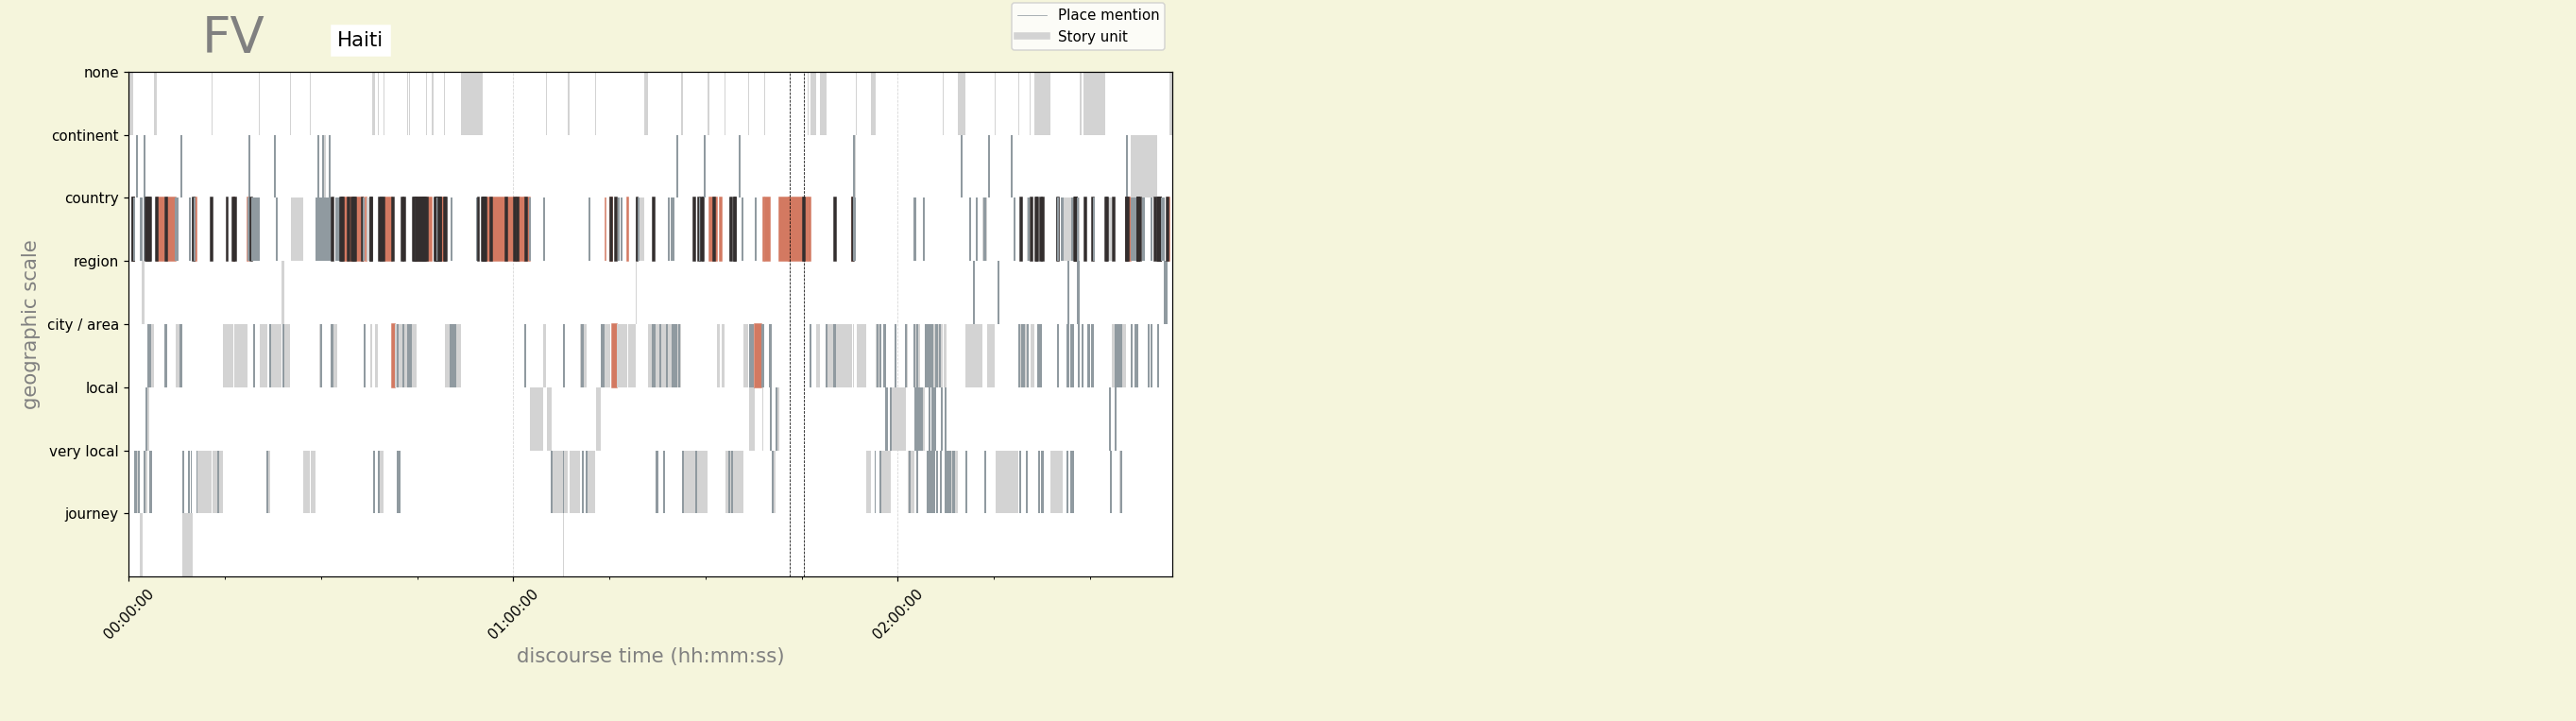

In [26]:
#each plot requires both the pm dataframe and su dataframe

for (k1, v1), (k2, v2) in zip(sorted(d1.items()), sorted(d2.items())):
    plotAll(k1, v1, k2, v2)

the graphs take a fixed width of 25 inches (units tbd), and calculate the length of the graph (x axis) as a proportion of this fixed viewpane. Thus, OG's story, which is 5.13 hours long, takes up 51.3% of the width of the viewpane, multiplied by 1.5 to take up roughly 75% of the viewpane. In this way, each graph's x-axis length (plot width) appears proportional to the story's length.
(note that there are still very minute differences in absolute distance between hour-tick marks on the x-axis between graphs. This has yet to be corrected...)

the following implements graph interactivity:

In [155]:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib
"""
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(10,10),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

"""

#artists = figure['ap'].axes[0].get_children()
#gid_o = artists[100].get_gid()
#artists[100].set_gid(gid_o+"_alt")
#artists[100].get_gid()[3:]

#hi = figure['ap'].axes[0].get_children()
#del artists[0]
#artists
#figure['ap'].axes[0].get_children().remove('Text')
#figure['fv'].axes[0].lines[0].properties()['color']
artists

{}

In [10]:
#convert time column to datetime64 with origin date at 1900/01/01 to simplify later tasks involving xticks


#cannot plot time in x axis with pandas, return error "ValueError: scatter requires x column to be numeric"
#use matplotlib/plt
#in order to be able to fill the space between the beginning and end of story units using plot_date, data needs to be converted from pandas Series to numpy array
#t_start_np_formatted = df_su['time_start'].values
#t_end_np_formatted = df_su['time_end'].values
#t_np_formatted = df_pm['time'].values
#these numpy arrays have to be used when using inbetween.

create dataframe for the graph specifically (only using time and scale)

In [11]:


#refactored as
#df_pm2 = df_pm[['time','scale']]

#remove date and only keep time

#pd.to_datetime(df_pm['time'], format='%H:%M').dt.time

draw plot

In [12]:


#this creates a FIGURE and AXES object from which all other matplotlib functionality will originate
#one can also create an axes objects from fig when doing fig.add_axes(ax)
#special plotting for data that indclude datetimes
"""
ax.plot_date(x=t_np_formatted, y=df_pm.scale_order, marker='|', markersize=25, color='k')
ax.plot_date(x=t_start_np_formatted, y=df_su.scale_order, marker='|', markersize=25, color='g')
ax.plot_date(x=t_end_np_formatted, y=df_su.scale_order, marker='|', markersize=25, color='b')
"""

#https://stackoverflow.com/questions/29329725/pandas-and-matplotlib-fill-between-vs-datetime64/29329823#29329823
#https://stackoverflow.com/questions/41754588/matplotlib-fill-between-method-and-datetime
#ax.fill_betweenx(y=df_su.scale_order, x1=t_start_np_formatted, x2=t_end_np_formatted, facecolor='r', alpha=0.5)





"\nax.plot_date(x=t_np_formatted, y=df_pm.scale_order, marker='|', markersize=25, color='k')\nax.plot_date(x=t_start_np_formatted, y=df_su.scale_order, marker='|', markersize=25, color='g')\nax.plot_date(x=t_end_np_formatted, y=df_su.scale_order, marker='|', markersize=25, color='b')\n"

In [13]:
#df_su.loc[df_su['time_start'].str.contains('NaT')]

#dates.date2num(df_su.iloc[10]['time_start'])
#dates.date2num(df_su.iloc[10]['time_start'])
#REMOVE NAT... THESE ARE LIKELY WHERE THE JOURNEYS ARE... ANOTHER REASON TO USE THE EXCEL SHEETS

print(len(df_su.index))

NameError: name 'df_su' is not defined

In [ ]:
#https://stackoverflow.com/questions/36907112/pandas-scatter-plot-versus-time-of-day
#https://stackoverflow.com/questions/43459786/plot-timeseries-scatterplot

In [276]:
#%reset
"""
figure = {}

def plotAll(name1, df1, name2, df2):
    
    #for calculating fig x-axis length (to make it proportional to each story's timespan)
    xaxisTime = str(df2.iloc[[-1]]['time_end'])
    xaxisHour = int(xaxisTime[17:19])
    xaxisMin = int(xaxisTime[20:22])
    
    fig = plt.figure(num=None, figsize=(25, 7), dpi=80, facecolor='beige', edgecolor='k')
    ax = plt.axes([0.05,0.2,((xaxisHour+(xaxisMin/60))/10)*1.5,0.7], xmargin=0.0, ymargin=0.0)
    
    invisible_plot = ax.plot_date(x=df2.time_start, y=df2.scale_order, marker = '|', markersize=40, color='b', alpha=0, zorder=3)#use time span of su data since they represent entire span of interview.
    mainplot = generateVspans(name1, df1, name2, df2, ax)
    artists = fig.axes[0].get_children()
    xmin, xmax = fig.get_children()[1].get_xlim()
    ymin, ymax = fig.get_children()[1].get_ylim()
    
    
    legend_elements = [Line2D([0], [0], color=pm_color, lw=0.5, label='Place mention'), Line2D([0], [0], color=su_color, lw=5, label='Story unit', alpha=0.5)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1.15))
    plt.title(name1[:2].upper(), y=1.02, x=0.1, fontsize = 35, color='gray')

    ax.set_xlabel('discourse time (hh:mm:ss)', fontsize=14, color='gray')
    ax.set_ylabel('geographic scale', fontsize=14, color='gray')

    hours = dates.HourLocator()
    minutes = dates.MinuteLocator(byminute=[15,30,45], interval=1)
    hoursFmt = dates.DateFormatter('%H:%M:%S')

    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hoursFmt)
    ax.xaxis.set_minor_locator(minutes)

    ylocs = ax.set_yticks([2,3,4,5,6,7,8,9], minor=False)
    ylabels = ax.set_yticklabels(['journey','very local','local','city / area','region','country','continent','none'], minor=False)

    ax.xaxis.grid(color='#808080', linestyle='dashed', linewidth=0.5, zorder = 1)
    ax.hlines(y = [2,3,4,5,6,7,8,9], xmin = xmin, xmax = xmax, color='#808080', linestyle='dashed', linewidth=0.5, zorder = 1)

    plt.xticks(rotation=45)
    
    def onpick(event):
        artist = event.artist
        lab = artist.get_label()
        color = artist.get_color()
        mouseevent = event.mouseevent
        x_data = mouseevent.xdata
        y_data = mouseevent.ydata
        
        
        if color == su_color_alt:
            artist.set_color(su_color)
            for artist in artists:
                lab_other = artist.get_label()
                if lab_other == lab:
                    artist.set_color(su_color)
                else:
                    pass
        elif color == pm_color_alt:
            artist.set_color(pm_color)
            for artist in artists:
                lab_other = artist.get_label()
                if lab_other == lab:
                    artist.set_color(pm_color)
                else:
                    pass
        else:
        
            plt.text(x_data, y_data, lab, fontsize=12)

            vline_x1 = artist.xy[0][0]
            vline_x2 = artist.xy[2][0]
            ax.vlines(x = [vline_x1, vline_x2], ymin = ymin, ymax = 9, color='k', linestyle='dashed', linewidth=0.5, zorder = 3)

            for artist in artists:
                lab_other = artist.get_label()
                if lab_other == lab & color == pm_color:
                    #xdata = artist.xy[0][0]
                    #ydata = artist.xy[0][1]
                    #plt.text(xdata, ydata, lab_other, fontsize=12)
                    artist.set_color(pm_color_alt)
                elif lab_other == lab & color == su_color:
                    artist.set_color(su_color_alt)
                else:
                    pass

    #connection_id1 = fig.canvas.mpl_connect('button_press_event', onclick)
    connection_id2 = fig.canvas.mpl_connect('pick_event', onpick)
    #https://stackoverflow.com/questions/24960910/how-can-i-pass-parameters-to-on-key-in-fig-canvas-mpl-connectkey-press-event/24960937



    #connection_id3 = fig.canvas.mpl_connect("motion_notify_event", lambda event: hover(event, mainplot, annot))
    
    figure[name1[:2]] = fig
    """

KeyError: 'ep_pm'